# TASK: Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

NAME: VOOLLA SAI DEEPIKA

PREDICTION USING SUPERVISED ML

In [54]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [33]:
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [35]:
s_data.shape

(25, 2)

In [16]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
s_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# DATA VISUALIZATION

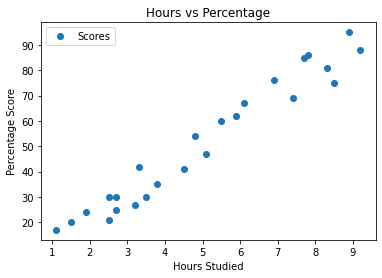

In [3]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Preparing the data 

In [40]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  
print("Shape of X =",X.shape)
print("Shape of y=",y.shape)

Shape of X = (25, 1)
Shape of y= (25,)


# SPLITTING THE DATA

In [41]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 
print("Shape of X_train =",X_train.shape)
print("Shape of y_train =",y_train.shape)
print("Shape of X_test =",X_test.shape)
print("Shape of y_test =",y_test.shape)

Shape of X_train = (20, 1)
Shape of y_train = (20,)
Shape of X_test = (5, 1)
Shape of y_test = (5,)


# TRAINING THE ALGORTHM

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


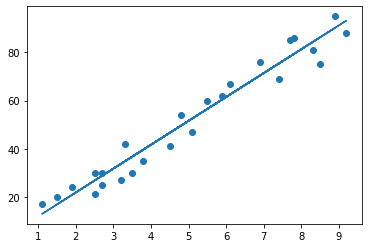

In [21]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [22]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Checking the accuracy for training and test set

Train set Score
0.9515510725211552


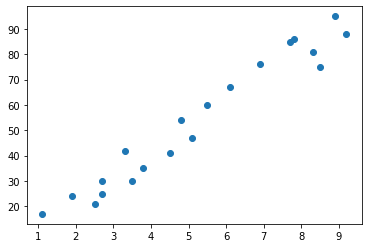

In [46]:
plt.scatter(X_train,y_train)
print("Train set Score")
print(regressor.score(X_train,y_train))

Test Score
0.9454906892105355


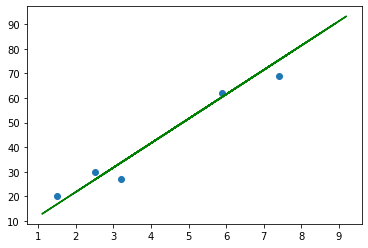

In [53]:
print("Test Score")
print(regressor.score(X_test,y_test))
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color="g")

# MAKING PREDICTIONS

In [23]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predicting the scores for 9.25 hours

In [27]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737535


# EVALUATING THE MODEL

In [57]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R-2: 0.9454906892105355


The model's accuracy is 94.54%

# SAVING THE MODEL

In [42]:
import joblib
joblib.dump(regressor,"TASK1.pckl")

['TASK1.pckl']

In [43]:
model=joblib.load("TASK1.pckl")